In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_curve, auc, precision_recall_curve, f1_score

In [2]:
# Cargar el dataset
df = pd.read_csv('dataset_elpino.csv', sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(df.columns)

Index(['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)',
       'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)',
       'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)',
       'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)',
       'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)',
       'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)',
       'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)',
       'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)',
       'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)',
       'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)',
       'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)',
       'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)',
       'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)',
       'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)',
       

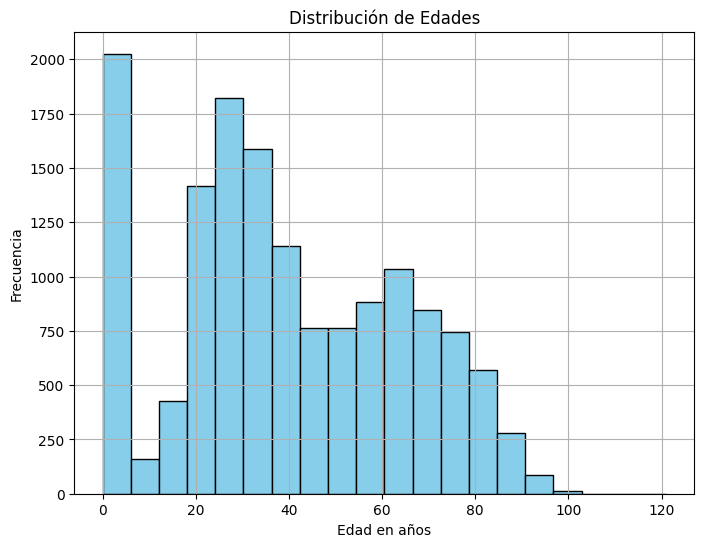

In [4]:
# Verificar si la columna 'Edad en años' tiene valores faltantes
if df['Edad en años'].isnull().sum() > 0:
    print("Hay valores faltantes en la columna 'Edad en años'. Se eliminarán antes de graficar.")
    # Eliminar filas con valores faltantes en 'Edad en años'
    df = df[df['Edad en años'].notna()]

# Generar el histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(df['Edad en años'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [5]:


print(" Cargando el dataset...")
df = pd.read_csv('dataset_elpino.csv', sep=';')
print(f" - Dimensiones iniciales: {df.shape}")
print(f" - Columnas: {list(df.columns)}\n")

print(" Filtrando GRDs con menos de 3 apariciones...")
grd_counts = df['GRD'].value_counts()
print(f" - Total clases GRD antes del filtro: {len(grd_counts)}")
df = df[df['GRD'].isin(grd_counts[grd_counts >= 3].index)]
print(f" - Total clases GRD después del filtro: {df['GRD'].nunique()}")
print(f" - Dimensiones actuales: {df.shape}\n")

print(" Eliminando fila con edad = 121")
before = df.shape[0]
df = df[df['Edad en años'] != 121]
after = df.shape[0]
print(f" - Filas eliminadas: {before - after}")
print(f" - Dimensiones actuales: {df.shape}\n")

print("Seleccionando columnas relevantes...")
diag_cols = [col for col in df.columns if 'Diag' in col]
proc_cols = [col for col in df.columns if 'Proced' in col]
selected_columns = diag_cols + proc_cols + ['Sexo (Desc)', 'GRD']
df = df[selected_columns]
print(f" - Columnas seleccionadas: {len(selected_columns)}")
print(f" - Primeras columnas: {selected_columns[:5]}...")
print(f" - Dimensiones finales: {df.shape}\n")

print("Transformando GRD: eliminando el último dígito...")
# Extraer los 5 primeros dígitos del código numérico en GRD
df['GRD'] = df['GRD'].astype(str).str.extract(r'(\d{5})')[0].astype(int)
print(f" - Valores únicos de GRD ahora: {df['GRD'].nunique()}")
print(f" - Ejemplo de GRD transformado:\n{df['GRD'].head()}")


 Cargando el dataset...
 - Dimensiones iniciales: (14561, 68)
 - Columnas: ['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)', 'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)', 'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)', 'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)', 'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)', 'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)', 'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)', 'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)', 'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)', 'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)', 'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)', 'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)', 'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)', 'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)', 'Diag 29 Secundario (cod+des)

In [6]:
print(df.columns)

Index(['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)',
       'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)',
       'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)',
       'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)',
       'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)',
       'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)',
       'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)',
       'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)',
       'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)',
       'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)',
       'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)',
       'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)',
       'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)',
       'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)',
       

In [7]:
# Binarizar la columna de sexo
df['Sexo (Desc)'] = df['Sexo (Desc)'].map({'Hombre': 1, 'Mujer': 0})
# Verificar los valores únicos en la columna 'Sexo (Desc)'
print(df['Sexo (Desc)'].unique())
#CANTIDAD HOMBRES Y MUJERES
print(df['Sexo (Desc)'].value_counts(dropna=False))



[1 0]
Sexo (Desc)
0    9530
1    4844
Name: count, dtype: int64


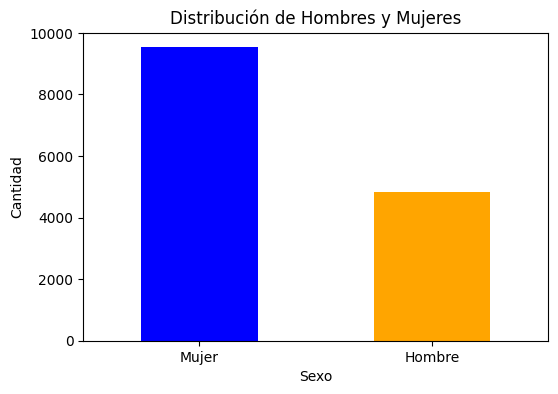

In [8]:


# Generar el gráfico de barras
plt.figure(figsize=(6, 4))
df['Sexo (Desc)'].value_counts(dropna=False).plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Hombres y Mujeres')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Mujer', 'Hombre'], rotation=0)
plt.show()

In [9]:
df.replace(['', ' ', '-', 'NA', 'N/A', 'nan', 'NaN'], np.nan, inplace=True)

In [10]:
# Ver resumen de valores faltantes
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

print(f" - Columnas con valores faltantes:\n{missing_cols}\n")
print(f" - Total de celdas faltantes: {df.isnull().sum().sum()}")

 - Columnas con valores faltantes:
Diag 02 Secundario (cod+des)       1200
Diag 03 Secundario (cod+des)       2661
Diag 04 Secundario (cod+des)       4088
Diag 05 Secundario (cod+des)       5315
Diag 06 Secundario (cod+des)       6320
                                  ...  
Proced 26 Secundario (cod+des)    12835
Proced 27 Secundario (cod+des)    12977
Proced 28 Secundario (cod+des)    13096
Proced 29 Secundario (cod+des)    13212
Proced 30 Secundario (cod+des)    13328
Length: 63, dtype: int64

 - Total de celdas faltantes: 641467


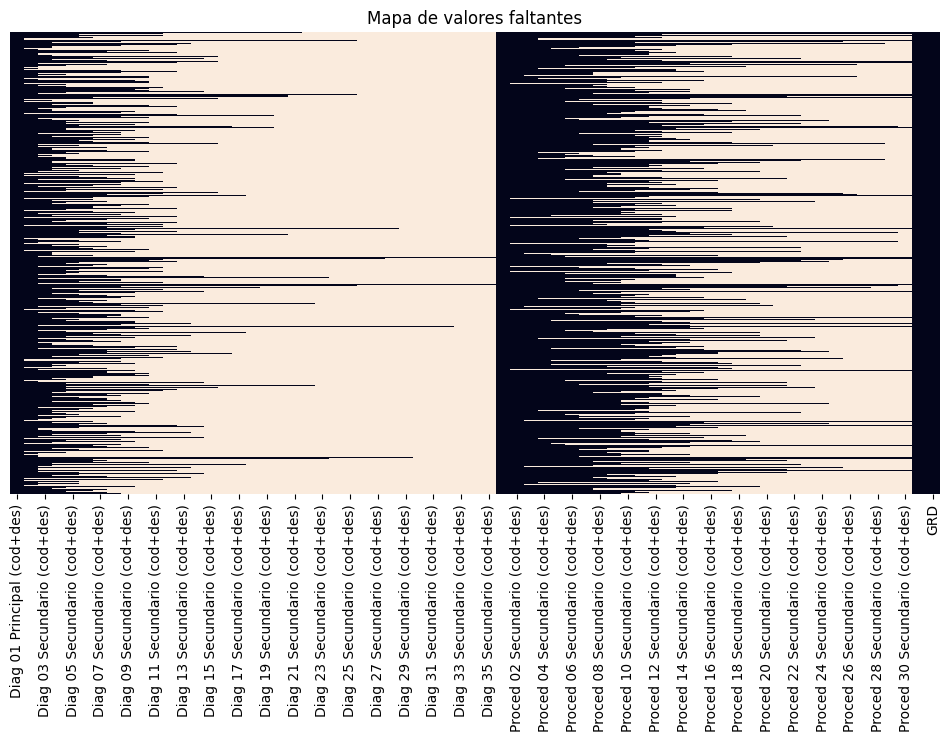

In [11]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Mapa de valores faltantes")
plt.show()

In [12]:
#para poner los datos faltantes como desconocido

for col in df.select_dtypes(include='object').columns:
    df[col].fillna('desconocido', inplace=True)

<ipython-input-12-00d4dc384544>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('desconocido', inplace=True)


In [13]:
# resumen de valores faltantes nuevamente
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

print(f" - Columnas con valores faltantes:\n{missing_cols}\n")
print(f" - Total de celdas faltantes: {df.isnull().sum().sum()}")

 - Columnas con valores faltantes:
Series([], dtype: int64)

 - Total de celdas faltantes: 0


In [14]:
# Ver cuántos valores "desconocido" hay en cada columna de tipo objeto
for col in df.select_dtypes(include='object').columns:
    print(f"Columna: {col}")
    print(f"Cantidad de 'desconocido': {df[col].value_counts().get('desconocido', 0)}")
    print("-" * 50)

Columna: Diag 01 Principal (cod+des)
Cantidad de 'desconocido': 0
--------------------------------------------------
Columna: Diag 02 Secundario (cod+des)
Cantidad de 'desconocido': 1200
--------------------------------------------------
Columna: Diag 03 Secundario (cod+des)
Cantidad de 'desconocido': 2661
--------------------------------------------------
Columna: Diag 04 Secundario (cod+des)
Cantidad de 'desconocido': 4088
--------------------------------------------------
Columna: Diag 05 Secundario (cod+des)
Cantidad de 'desconocido': 5315
--------------------------------------------------
Columna: Diag 06 Secundario (cod+des)
Cantidad de 'desconocido': 6320
--------------------------------------------------
Columna: Diag 07 Secundario (cod+des)
Cantidad de 'desconocido': 7318
--------------------------------------------------
Columna: Diag 08 Secundario (cod+des)
Cantidad de 'desconocido': 8476
--------------------------------------------------
Columna: Diag 09 Secundario (cod+des

In [15]:
print(df['Sexo (Desc)'].unique())

[1 0]


In [16]:
print("\nAplicando One-Hot Encoding a variables categóricas...")

# Detectamos columnas categóricas (tipo object)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Aplicamos One-Hot Encoding solo a esas
df_cat = pd.get_dummies(df[cat_cols], prefix=cat_cols, dummy_na=False)

# Combinamos con el resto de variables (como sexo y GRD)
X = pd.concat([df_cat.reset_index(drop=True),
               df[['Sexo (Desc)']].reset_index(drop=True)], axis=1)

print(f" - Dimensiones finales de X: {X.shape}")


Aplicando One-Hot Encoding a variables categóricas...
 - Dimensiones finales de X: (14374, 21265)


In [17]:
# Codificar y como etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(df['GRD'])
y_onehot = to_categorical(y_encoded)

print(f" - Número de clases GRD: {len(le.classes_)}")
print(f" - Forma final de y_onehot: {y_onehot.shape}")

 - Número de clases GRD: 169
 - Forma final de y_onehot: (14374, 169)


Normalización de características:



In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X_scaled)

[[-0.01444831 -0.02207323 -0.01179659 ... -0.04649014 -3.56957614
   1.40263407]
 [-0.01444831 -0.02207323 -0.01179659 ... -0.04649014 -3.56957614
   1.40263407]
 [-0.01444831 -0.02207323 -0.01179659 ... -0.04649014 -3.56957614
   1.40263407]
 ...
 [-0.01444831 -0.02207323 -0.01179659 ... -0.04649014  0.28014531
   1.40263407]
 [-0.01444831 -0.02207323 -0.01179659 ... -0.04649014  0.28014531
   1.40263407]
 [-0.01444831 -0.02207323 -0.01179659 ... -0.04649014 -3.56957614
   1.40263407]]


Validación y división de datos

In [19]:
seed=17082003
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=seed)


In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [21]:
# Crear el modelo
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(169, activation='softmax')  # Asumiendo que hay 169 clases
])
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ver resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     5,444,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 169)            │        21,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,500,329 (20.98 MB)

 Trainable params: 5,499,561 (20.98 MB)

 Non-trainable params: 768 (3.00 KB)

In [22]:
# Entrenamiento
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    verbose=1)
                    #callbacks=[early_stop]"

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.0576 - loss: 5.9406 - val_accuracy: 0.3443 - val_loss: 4.4265
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3754 - loss: 3.9318 - val_accuracy: 0.5023 - val_loss: 3.5398
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6204 - loss: 2.7521 - val_accuracy: 0.5837 - val_loss: 3.0353
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7716 - loss: 2.0268 - val_accuracy: 0.6428 - val_loss: 2.6805
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8676 - loss: 1.5458 - val_accuracy: 0.6800 - val_loss: 2.4220
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9152 - loss: 1.2349 - val_accuracy: 0.7113 - val_loss: 2.2187
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9459 - loss: 1.0049 - val_accuracy: 0.7336 - val_loss: 2.0631
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9622 - loss: 0.8571 - val_accuracy: 

In [29]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validación - Pérdida: {val_loss}")
print(f"Validación - Precisión: {val_accuracy}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 0.8922
Validación - Pérdida: 0.8672432899475098
Validación - Precisión: 0.8504347801208496


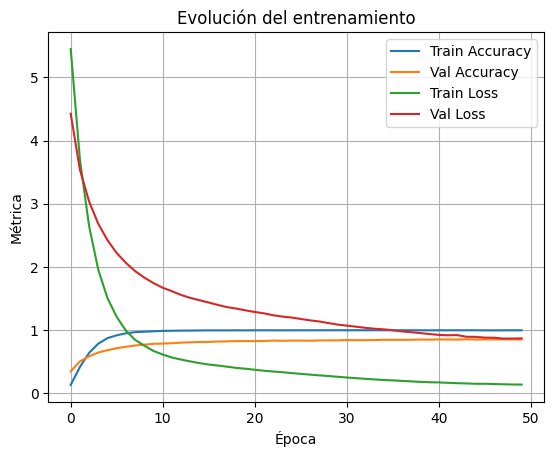

In [30]:
# Suponiendo que tienes el historial en 'history'
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Evolución del entrenamiento")
plt.xlabel("Época")
plt.ylabel("Métrica")
plt.grid(True)
plt.show()

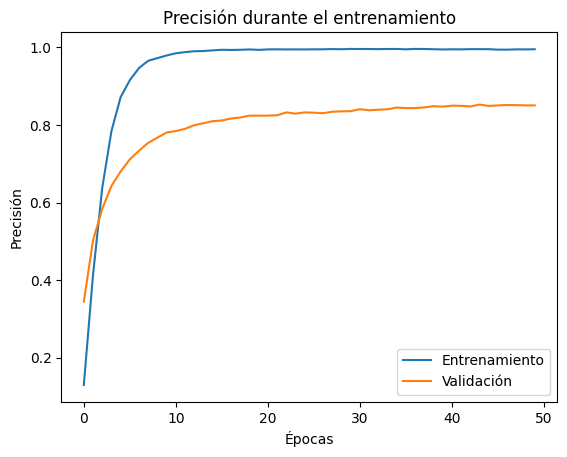

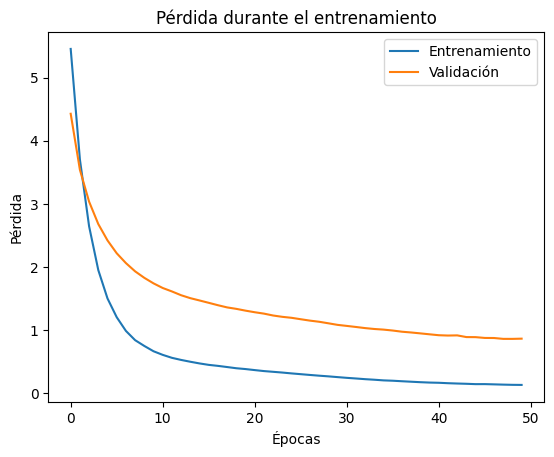

In [31]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


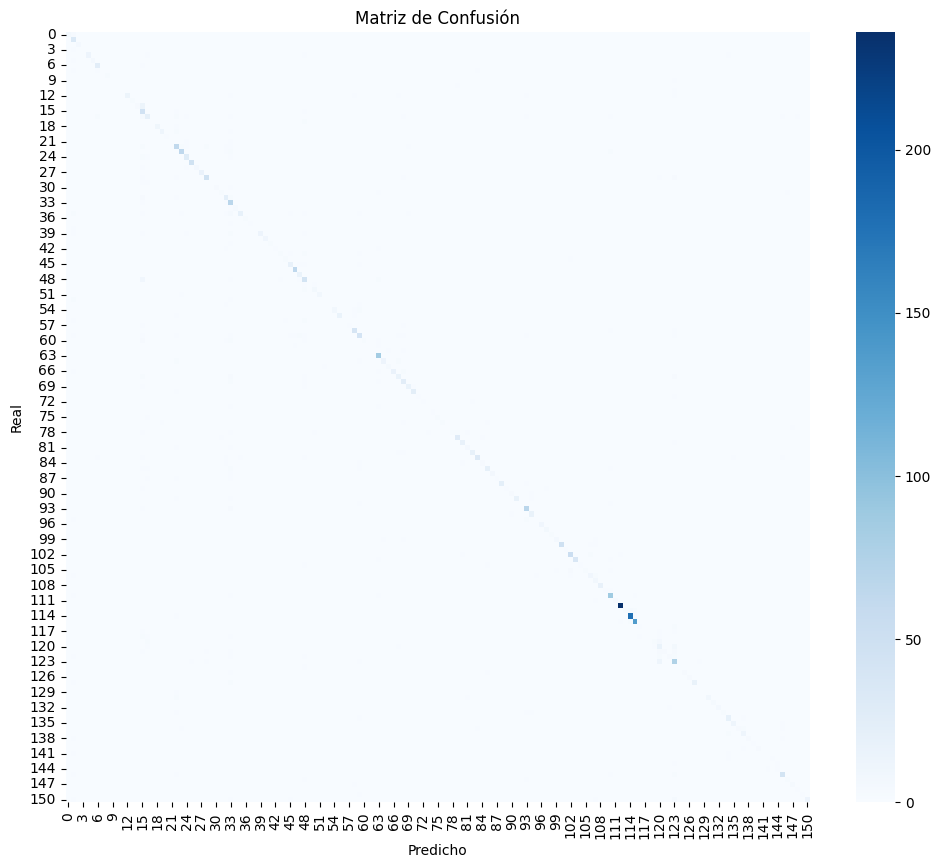

In [26]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


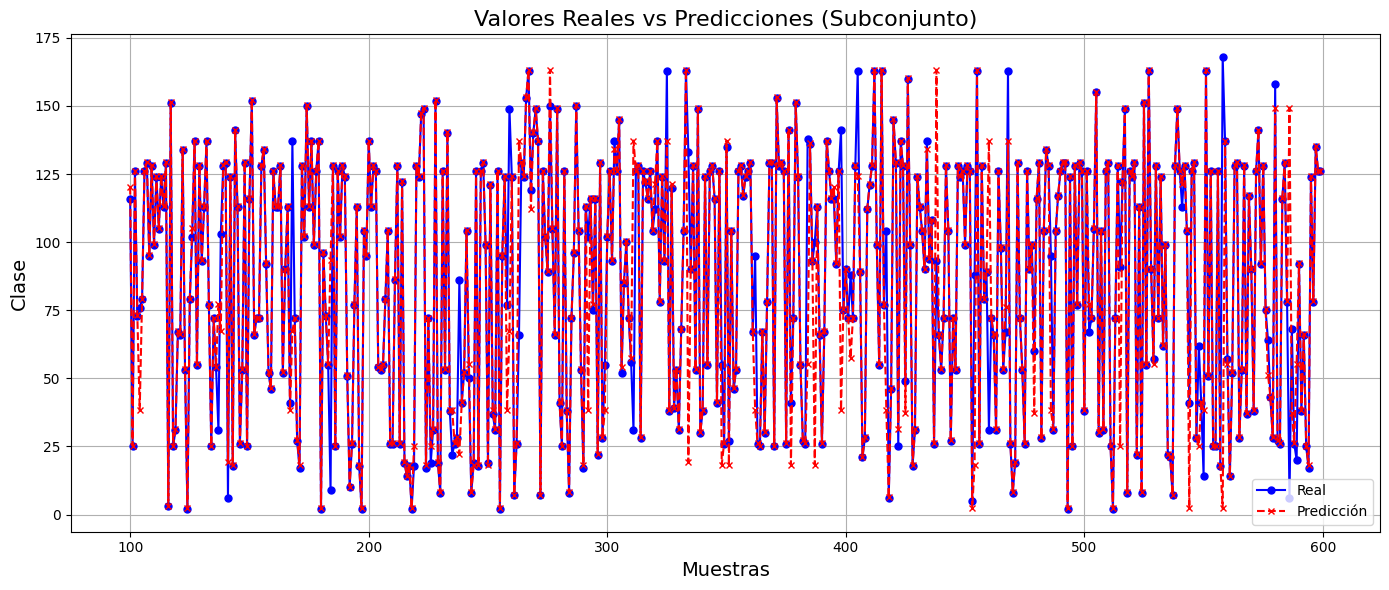

In [27]:
# Obtener las predicciones (asegurándote de que las dimensiones coincidan)
yv_pred = model.predict(X_val)
yv_pred = np.argmax(yv_pred, axis=1)  # Convertir las predicciones one-hot a clases

# Seleccionar un rango de índices para mostrar un "trozo" del gráfico
start_idx = 100  # Indice de inicio
end_idx = 600  # Indice de fin (cambiar según el rango que quieras mostrar)
eje = np.arange(start_idx, end_idx, 1.0)

# Graficar
fig = plt.figure(figsize=(14, 6))  # Aumentar el tamaño de la figura
ax1 = fig.add_subplot(111)

# Graficar las líneas para los valores reales y las predicciones con más detalles
ax1.plot(eje, np.argmax(y_val[start_idx:end_idx], axis=1), c='b', label='Real', linestyle='-', marker='o', markersize=5)  # Línea azul con círculos
ax1.plot(eje, yv_pred[start_idx:end_idx] + 0.3, c='r', label='Predicción', linestyle='--', marker='x', markersize=5)  # Línea roja con 'x' desplazada

# Títulos y etiquetas
ax1.set_title('Valores Reales vs Predicciones (Subconjunto)', fontsize=16)
ax1.set_xlabel('Muestras', fontsize=14)
ax1.set_ylabel('Clase', fontsize=14)

# Añadir leyenda y mostrar la gráfica
plt.legend(loc='lower right')
plt.grid(True)  # Activar la cuadrícula para mejor visibilidad
plt.tight_layout()  # Ajustar para evitar recortes
plt.show()


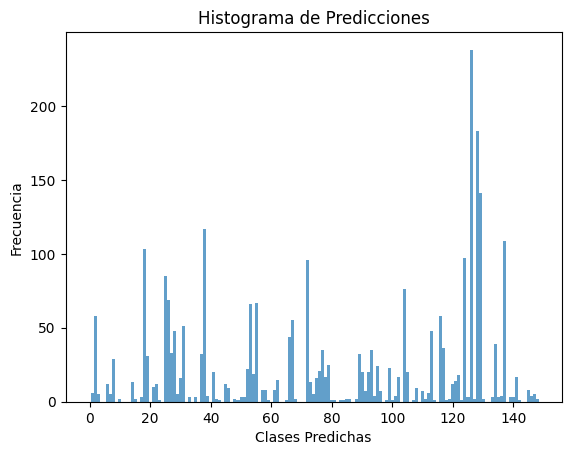

In [28]:
plt.hist(y_pred_classes, bins=np.arange(len(np.unique(y_true)))-0.5, alpha=0.7)
plt.title('Histograma de Predicciones')
plt.xlabel('Clases Predichas')
plt.ylabel('Frecuencia')
plt.show()

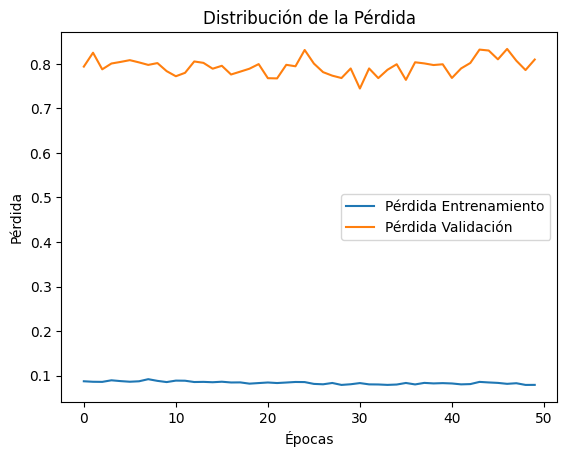

In [ ]:
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Distribución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           1       1.00      0.56      0.71         9
           2       0.82      0.97      0.89        34
           3       1.00      1.00      1.00         5
           5       0.00      0.00      0.00         1
           6       0.87      0.87      0.87        15
           7       1.00      0.83      0.91         6
           8       0.93      0.96      0.94        26
           9       0.00      0.00      0.00         3
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.72      0.84        18
          15       1.00      1.00      1.00         2
          17       1.00      0.44      0.61        16
          18       0.61      0.75      0.67        48
          19       0.47      0.75      0.58        36
          20       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_